<a href="https://colab.research.google.com/github/samuelcueva/tensorflow_course_udemy/blob/master/Red_Neuronal_Convolucional_con_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

In [1]:
#!pip install tensorflow-gpu==2.0.0.alpha0

## Paso 2: Importar las librerías necesarias

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0'

In [3]:
import numpy as np

In [4]:
x=tf.constant( np.random.rand(1,4,5,1))
x

<tf.Tensor: shape=(1, 4, 5, 1), dtype=float64, numpy=
array([[[[0.29161503],
         [0.40296866],
         [0.79536024],
         [0.08442022],
         [0.95419937]],

        [[0.79945207],
         [0.1056825 ],
         [0.07889188],
         [0.98585106],
         [0.96675218]],

        [[0.41592302],
         [0.04400013],
         [0.55119451],
         [0.39534003],
         [0.14835763]],

        [[0.2868891 ],
         [0.02804395],
         [0.82371443],
         [0.45509163],
         [0.5261451 ]]]])>

In [5]:
conv=tf.keras.layers.Conv2D( 1,(3,3), padding="valid"  )
conv

In [6]:
conv(x)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 2, 3, 1), dtype=float32, numpy=
array([[[[0.31151506],
         [0.9925871 ],
         [0.3167444 ]],

        [[0.5861846 ],
         [0.0436662 ],
         [0.6032693 ]]]], dtype=float32)>

In [7]:
x

<tf.Tensor: shape=(1, 4, 5, 1), dtype=float64, numpy=
array([[[[0.29161503],
         [0.40296866],
         [0.79536024],
         [0.08442022],
         [0.95419937]],

        [[0.79945207],
         [0.1056825 ],
         [0.07889188],
         [0.98585106],
         [0.96675218]],

        [[0.41592302],
         [0.04400013],
         [0.55119451],
         [0.39534003],
         [0.14835763]],

        [[0.2868891 ],
         [0.02804395],
         [0.82371443],
         [0.45509163],
         [0.5261451 ]]]])>

In [8]:
pool=tf.keras.layers.MaxPool2D((3,3) ,padding="valid")

In [9]:
pool(x)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.79945207]]]], dtype=float32)>

In [10]:
conv.variables

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[ 0.471735  ]],
 
         [[ 0.5636945 ]],
 
         [[-0.36971045]]],
 
 
        [[[ 0.2705158 ]],
 
         [[-0.15460315]],
 
         [[ 0.15741152]]],
 
 
        [[[ 0.12006211]],
 
         [[ 0.43082917]],
 
         [[-0.07326877]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [11]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [12]:
# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Normalización de las imágenes

In [13]:
X_train = X_train / 255.0

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_test = X_test / 255.0

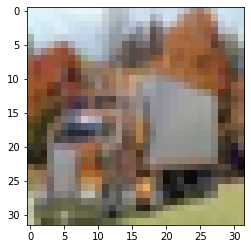

In [16]:
n=np.random.randint(10000,size=1 )
n=n[0]
plt.imshow(X_test[n])

In [17]:
y_test[n]

array([9], dtype=uint8)

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [66]:
model = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [67]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [68]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [69]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [70]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [71]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [72]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening

In [73]:
model.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128
- activation: relu

In [74]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [75]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [76]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 4096)            

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [77]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

función para construir el modelo y probarlo más dinámicamente

In [92]:
def build_model(units_per_block,kernel_per_block):
  model=tf.keras.Sequential([
                             #block 1
                             tf.keras.layers.Conv2D(units_per_block[0],kernel_size=kernel_per_block[0],padding="same",activation="relu",input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(units_per_block[0],kernel_size=kernel_per_block[0],padding="same",activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                             #block 2
                             tf.keras.layers.Conv2D(units_per_block[1],kernel_size=kernel_per_block[1],padding="same",activation="relu"),
                             tf.keras.layers.Conv2D(units_per_block[1],kernel_size=kernel_per_block[1],padding="same",activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                             #block 3
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units_per_block[2],activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")
                             
  ])
  model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
  return model

model=build_model([32,64,128],[3,3])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 4096)            

### Entrenar el modelo

In [85]:
model.fit(X_train, y_train, epochs=5,batch_size=10)

Epoch 1/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.6907 - sparse_categorical_accuracy: 0.7581
Epoch 2/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.5591 - sparse_categorical_accuracy: 0.8061
Epoch 3/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.4538 - sparse_categorical_accuracy: 0.8404
Epoch 4/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.3719 - sparse_categorical_accuracy: 0.8689
Epoch 5/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.3130 - sparse_categorical_accuracy: 0.8914


0.8359

In [93]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3505 - sparse_categorical_accuracy: 0.5128
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8857 - sparse_categorical_accuracy: 0.6901
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7006 - sparse_categorical_accuracy: 0.7561
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5768 - sparse_categorical_accuracy: 0.7973
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4753 - sparse_categorical_accuracy: 0.8328


### Evaluar el modelo

In [96]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7730 - sparse_categorical_accuracy: 0.7438


In [97]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7437999844551086
